In [15]:
!pip install tensorflow
!pip install tensorflow numpy matplotlib
!pip install gdown
!pip install rarfile
import numpy as np
import gdown
import os
import rarfile
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
file_id = "1Lb0CIXnDK7cFlAcq4Pf-_BHCr9D_8EzF"
url = f"https://drive.google.com/uc?id={file_id}"
output = "dataset.rar"

gdown.download(url, output, quiet=False)

with rarfile.RarFile(output, 'r') as archive:
    archive.extractall("dataset_folder")


Downloading...
From: https://drive.google.com/uc?id=1Lb0CIXnDK7cFlAcq4Pf-_BHCr9D_8EzF
To: /content/dataset.rar
100%|██████████| 43.1M/43.1M [00:00<00:00, 97.4MB/s]


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ganti 'path/to/dataset_folder' dengan path yang benar ke direktori gambar di Google Colab Anda
data_dir = "/content/dataset_folder/dataset"

# Definisikan ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Proporsi data untuk validasi
)

# Menggunakan ImageDataGenerator untuk memuat dan mengatur ulang data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Bagian data untuk pelatihan
    shuffle=True  # Anda bisa memilih untuk mengacak data atau tidak
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Bagian data untuk validasi
    shuffle=True  # Anda bisa memilih untuk mengacak data atau tidak
)


Found 1192 images belonging to 6 classes.
Found 294 images belonging to 6 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

# Membuat model dengan VGG16 sebagai lapisan basis
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Membangun model
model = Sequential()

# Menambahkan lapisan VGG16 sebagai lapisan basis
model.add(base_model)

# Menambahkan lapisan Flatten untuk mengubah output dari VGG16 menjadi vektor 1D
model.add(Flatten())

# Menambahkan lapisan Dense dengan 256 neuron dan fungsi aktivasi ReLU
model.add(Dense(256, activation='relu'))

# Menambahkan lapisan Dense dengan jumlah kelas Anda dan fungsi aktivasi softmax
model.add(Dense(6, activation='softmax'))  # Sesuaikan dengan jumlah kelas Anda

# Setelah membangun model, mematikan pembelajaran untuk lapisan basis (VGG16)
for layer in base_model.layers:
    layer.trainable = False

# Menampilkan ringkasan model
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 21139014 (80.64 MB)
Trainable params: 6424326 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Epoch 1/10
38/38 [==============================] - 33s 555ms/step - loss: 2.1208 - accuracy: 0.5940 - val_loss: 0.4446 - val_accuracy: 0.8503
Epoch 2/10
38/38 [==============================] - 20s 524ms/step - loss: 0.3524 - accuracy: 0.8909 - val_loss: 0.2907 - val_accuracy: 0.9082
Epoch 3/10
38/38 [==============================] - 20s 515ms/step - loss: 0.2011 - accuracy: 0.9371 - val_loss: 0.2781 - val_accuracy: 0.9218
Epoch 4/10
38/38 [==============================] - 21s 553ms/step - loss: 0.1521 - accuracy: 0.9589 - val_loss: 0.2210 - val_accuracy: 0.9286
Epoch 5/10
38/38 [==============================] - 21s 558ms/step - loss: 0.0893 - accuracy: 0.9799 - val_loss: 0.3281 - val_accuracy: 0.8844
Epoch 6/10
38/38 [==============================] - 19s 512ms/step - loss: 0.0531 - accuracy: 0.9849 - val_loss: 0.3109 - val_accuracy: 0.9082
Epoch 7/10
38/38 [==============================] - 20s 537ms/step - loss: 0.0552 - accuracy: 0.9866 - val_loss: 0.2166 - val_accuracy: 0.9388

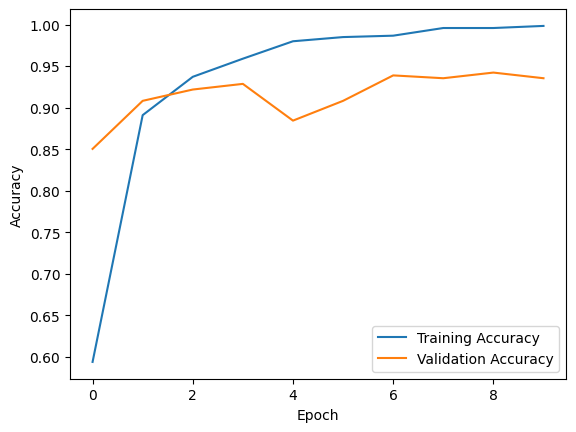

In [9]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model menggunakan generator
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluasi model pada data validasi
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy}')

# Plot kurva pelatihan dan validasi
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.save('mymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
model = load_model('mymodel.h5')  # Ganti dengan path model Anda

# Function to process the uploaded image and make a prediction
def process_uploaded_image(file_path):
    # Load and preprocess the image
    img = image.load_img(file_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_array)

    # Display the result
    predicted_class = np.argmax(prediction)
    print(f'Predicted Class Index: {predicted_class}')

# Upload image files
uploaded_files = files.upload()

# Process and make predictions for each uploaded file
for file_name in uploaded_files.keys():
    file_path = file_name
    Image(file_path)  # Display the uploaded image
    process_uploaded_image(file_path)

Saving kelereng.jpg to kelereng.jpg
1/1 [==============================] - 0s 141ms/step
Predicted Class Index: 0
